In [237]:
import os
# import tabula
import pandas as pd
import PyPDF2
import re
import camelot
import numpy as np

In [157]:
stockA = pd.read_csv("../data/stockAssesment2020/StockAssessment.csv")

C:\Users\isaldiviagonzatti\AppData\Local\Temp\ipykernel_2504\3791297337.py:1: DtypeWarning: Columns (55,63,98,99,101,102,104,105,107,108,110,111,113,114,116,117,119,120,122,123,125,126,128,129,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  stockA = pd.read_csv("../data/stockAssesment2020/StockAssessment.csv")


In [158]:
stockA[stockA['StockDescription'].str.contains("Blue ling")].StockDescription.unique()

array(['Blue ling (Molva dypterygia) in subareas 6-7 and Division 5.b (Celtic Seas and Faroes grounds)'],
      dtype=object)

In [449]:
fishStock = 'sol.27.20-24'

In [450]:
obj = PyPDF2.PdfFileReader(r"C:\Users\isaldiviagonzatti\Downloads\pdfsICES\{}.pdf".format(fishStock))

pgno = obj.getNumPages()

s = "Table 6"

for i in range(0, pgno):
    PgOb = obj.getPage(i)
    Text = PgOb.extractText()
    if re.search(s,Text):
         pages=str(i+1) + ',' + str(i+2)
         print(pages)

4,5


In [451]:
# from camelot import utils
# layout, dim = utils.get_page_layout(r'C:\Users\isaldiviagonzatti\Downloads\pdfsICES\spr.27.3a4.pdf')

In [452]:
# table_areas accepts strings of the form x1,y1,x2,y2 where (x1, y1) -> top-left and (x2, y2)
tables = camelot.read_pdf(r"C:\Users\isaldiviagonzatti\Downloads\pdfsICES\{}.pdf".format(fishStock), 
                           pages=pages, 
                           backend="poppler", 
                           # flavor='stream',
                           # table_area=['0,600,590,700'],
                           # iterations=1,
                           line_scale=30,
                           # split_text=True,
                           strip_text=['^','<', '-', '≤', '***', '\n'],
                          )
print("Total tables extracted:", tables.n)

Total tables extracted: 5


In [453]:
if tables.n > 1:
    # if table in same page is divided in two, then concatenate
    if pd.to_numeric(tables[1].df[0][0], errors='coerce')> 0:
        tableSix = pd.concat([tables[0].df, tables[1].df])
    # if table is divided in two pages, then concatenate
    elif tables[1].df.iloc[0,:].equals(tables[0].df.iloc[0,:]) == True:
        tableSix = pd.concat([tables[1].df, tables[2].df])
    else:
        tableSix = tables[0].df
if tables.n > 2:
    # if table is divided in two pages, then concatenate
    if tables[2].df.iloc[0,:].equals(tables[0].df.iloc[0,:]) == True:
        tableSix = pd.concat([tableSix, tables[2].df])

In [457]:
# fix table 
icesTable = tableSix.copy()
icesTable.columns = icesTable.iloc[0,:]
icesTable = icesTable[1:]
icesTable['fishStock'] = fishStock
icesTable = icesTable[icesTable['Year'].astype(str).str.isnumeric()]

icesTable = icesTable.rename(columns={
'Predicted catch corresponding to advice':'SAD',
'Catch corresponding to advice': 'SAD',
'Landings corresponding to advice': 'SAD_landings',
'Agreed TAC': 'TAC',
'ICES landings': 'Landings'})
numericCol = ['SAD', 'SAD_landings', 'TAC', 'Landings', 'Year']

for col in icesTable.columns:
    if col in numericCol:
        icesTable[col] = icesTable[col].replace({' ': ''}, regex=True)
        icesTable[col] = icesTable[col].apply(pd.to_numeric, errors='coerce')

icesTable

,Year,ICES advice,SAD,SAD_landings,TAC,Landings,ICES discards,fishStock
1,1987,,NaN,NaN,850.0,722.0,,sol.27.20-24
0,1988,,NaN,NaN,950.0,706.0,,sol.27.20-24
1,1989,TAC,NaN,800.0,800.0,824.0,,sol.27.20-24
2,1990,Precautionary TAC,NaN,600.0,500.0,1050.0,,sol.27.20-24
3,1991,TAC,NaN,1000.0,1000.0,NaN,,sol.27.20-24
4,1992,TAC,NaN,1000.0,1400.0,NaN,,sol.27.20-24
5,1993,TAC at recent catch levels,NaN,1000.0,1600.0,NaN,,sol.27.20-24
6,1994,No advice due to uncertain catches,NaN,NaN,2100.0,1198.0,,sol.27.20-24
7,1995,No advice,NaN,NaN,2250.0,1297.0,,sol.27.20-24
8,1996,No advice,NaN,NaN,2250.0,1059.0,,sol.27.20-24


In [459]:
# add columns from excel and reorganize
my_cols_list=[ 'Most recent assessment with corresponding report', 
'Catches (stockass)', 'Catches (pdfs)', 'done?', 'report']

excelTable = icesTable.reindex(columns=[*icesTable.columns.tolist(), *my_cols_list])

excelTable = excelTable[['fishStock', 'Most recent assessment with corresponding report',
 'Year','Catches (stockass)', 'SAD','TAC', 'Catches (pdfs)','done?', 'report','Landings']]

# icesTable = icesTable.replace('','N/A')
excelTable.set_index('fishStock', inplace=True)
excelTable.to_csv("../dataTemp/{}.csv".format(fishStock))

,Most recent assessment with corresponding report,Year,Catches (stockass),SAD,TAC,Catches (pdfs),done?,report,Landings
fishStock,,,,,,,,,
sol.27.20-24,NaN,1987,NaN,NaN,850.0,NaN,NaN,NaN,722.0
sol.27.20-24,NaN,1988,NaN,NaN,950.0,NaN,NaN,NaN,706.0
sol.27.20-24,NaN,1989,NaN,NaN,800.0,NaN,NaN,NaN,824.0
sol.27.20-24,NaN,1990,NaN,NaN,500.0,NaN,NaN,NaN,1050.0
sol.27.20-24,NaN,1991,NaN,NaN,1000.0,NaN,NaN,NaN,NaN
sol.27.20-24,NaN,1992,NaN,NaN,1400.0,NaN,NaN,NaN,NaN
sol.27.20-24,NaN,1993,NaN,NaN,1600.0,NaN,NaN,NaN,NaN
sol.27.20-24,NaN,1994,NaN,NaN,2100.0,NaN,NaN,NaN,1198.0
sol.27.20-24,NaN,1995,NaN,NaN,2250.0,NaN,NaN,NaN,1297.0


C:\Users\isaldiviagonzatti\AppData\Local\Temp\ipykernel_2504\3259206825.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='text').show()


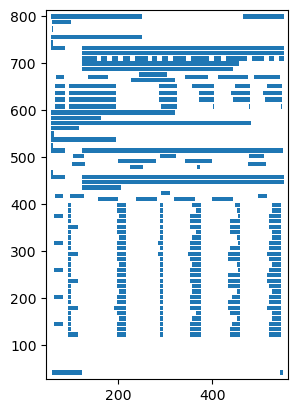

In [165]:
camelot.plot(tables[0], kind='text').show()

In [162]:
# tables = tabula.read_pdf(r"C:\Users\isaldiviagonzatti\Downloads\pdfsICES\spr.27.3a4.pdf", multiple_tables=True, 
#                           pages=page, lattice=True, guess=True, java_options="-Dfile.encoding=UTF8")                        


In [159]:
# tabula.convert_into("file:///C:/Users/isaldiviagonzatti/OneDrive%20-%20Kiel%20Institut%20f%C3%BCr%20Weltwirtschaft/Documents/General/Ignacio/data/pdf_ices_test/bli.27.5b67.pdf", r"C:/Users/isaldiviagonzatti//Downloads/test.csv", output_format="csv", stream=True, pages='4')

In [ ]:
# i=1
# for table in tables:
#     table.columns = table.iloc[0]
#     table = table.reindex(table.index.drop(0)).reset_index(drop=True)
#     table.columns.name = None
#     #To write Excel
#     table.to_excel('output'+str(i)+'.xlsx',header=True,index=False)
#     #To write CSV
#     table.to_csv('output'+str(i)+'.csv',sep='|',header=True,index=False)
#     i=i+1